## REI602M Machine Learning - Homework 7
### Due: *Monday* 4.3.2019

**Objectives**: Visualization with principal component analysis and t-SNE. $k$-means clustering

**Name**: Emil Gauti Friðriksson, **email: ** egf3@hi.is, **collaborators:** (if any)

1\. [Visualization, 40 points] In this problem you will use PCA and t-SNE to visualize a high-dimensional data set derived from 300 Wikipedia articles selected from few broad groups of topics. For each Wikipedia article, the most common words such as 'an' and 'the' were removed and the rest of the words run through a stemming algorithm (converting e.g. 'longer' and 'longest' to 'long'). This resulted in a dictionary of all the words that occur in the 300 articles. The total number of words was 1000. A 1000-element histogram vector was then constructed for each article, where element $j$ is the frequency of word $j$ in the document, i.e. a 300 by 1000 matrix.

The Numpy file `wikipedia_corpus.npz` contains three arrays which you access as follows

```python
import numpy as np
data=np.load('wikipedia_corpus.npz')
dictionary = data["dictionary"]
article_titles = data["article_titles"]
article_histograms = data["article_histograms"] # Data matrix```

a) [20 points] Use PCA to create a 2D figure where each article in the figure is represent by a short string based on its title.

b) [10 points] Use the t-SNE code provided with the assignment to create a similar figure to the one in a). You may need to try a few different values of the perplexity parameter before you get a nice projection (include only the best one in your report). Can you "squeeze" more titles into this figure than the one in a)? What can you infer from your visualization?

c) [10 points] Use t-SNE to project the data to 3 dimensions. Use the first two dimensions as text coordinates but use the 3rd coordinate to color code the article title. Is this figure more informative than the one in b) in your opinion?

*Comments*:

1) Creating informative figures usually takes some effort so expect to spend some time tinkering with your figure. See http://www.cs.toronto.edu/~hinton/turian.png for an example of how your figure could look like.

2) You should try to use as large figure as possible, use `plt.figure(figsize=(xsize,ysize))`

3) You can only display titles of 100 - 150 articles in the figure, otherwise you are likely to end up with a black mess.

4) Some of the titles are quite long and you should therefore truncate them somehow, e.g. by keeping only the two first words in the title. Useful Python's string `split` and `join` methods may come in handy. Use `plt.text` to display text in the figure.

5) For the color figure in c) see e.g. https://lvdmaaten.github.io/tsne/examples/semantic_tsne.jpg

6) A simple way to convert coordinate values into a color value is to map them into an integer betwen 0 and 9 and use the `color=Cx` keyword argument in `plt.text` (x represents an integer between 0 and 9).

7) Use PCA from scikit and the t-SNE code provided with this assignment (taken from https://lvdmaaten.github.io/tsne/)

In [7]:
#Use PCA to create a 2D figure where each article 
#in the figure is represent by a short string based on its title.
from sklearn.decomposition import PCA
import numpy as np
from tsne import tsne 
data=np.load('wikipedia_corpus.npz')
dictionary = data["dictionary"]
article_titles = data["article_titles"]
article_histograms = data["article_histograms"] # Data matrix

pca = PCA(n_components=2)
maff = tsne(article_histograms)
#pca.fit(article_histograms)
#print(pca)
#print(dictionary)
#print(article_titles)
#print(article_histograms)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 300...
Mean value of sigma: 0.378086
Iteration 10: error is 13.420798
Iteration 20: error is 12.523324
Iteration 30: error is 12.876721
Iteration 40: error is 12.730883
Iteration 50: error is 12.986733
Iteration 60: error is 13.199955
Iteration 70: error is 13.143156
Iteration 80: error is 13.172676
Iteration 90: error is 13.322478
Iteration 100: error is 12.662331
Iteration 110: error is 1.194415
Iteration 120: error is 0.746287
Iteration 130: error is 0.564011
Iteration 140: error is 0.497519
Iteration 150: error is 0.460176
Iteration 160: error is 0.443827
Iteration 170: error is 0.429617
Iteration 180: error is 0.421571
Iteration 190: error is 0.417571
Iteration 200: error is 0.413495
Iteration 210: error is 0.409080
Iteration 220: error is 0.407166
Iteration 230: error is 0.403660
Iteration 240: error is 0.400672
Iteration 250: error is 0.399458
Iteration 260: error is 0.398663
It

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 300...
Mean value of sigma: 0.344650
Iteration 10: error is 15.182873
Iteration 20: error is 13.051195
Iteration 30: error is 12.899577
Iteration 40: error is 12.901586
Iteration 50: error is 12.899292
Iteration 60: error is 13.045918
Iteration 70: error is 12.813330
Iteration 80: error is 13.452400
Iteration 90: error is 13.203082
Iteration 100: error is 13.351981
Iteration 110: error is 1.548285
Iteration 120: error is 0.912142
Iteration 130: error is 0.674102
Iteration 140: error is 0.580153
Iteration 150: error is 0.542999
Iteration 160: error is 0.520333
Iteration 170: error is 0.501339
Iteration 180: error is 0.484863
Iteration 190: error is 0.471227
Iteration 200: error is 0.463646
Iteration 210: error is 0.458857
Iteration 220: error is 0.455810
Iteration 230: error is 0.453636
Iteration 240: error is 0.451779
Iteration 250: error is 0.449197
Iteration 260: error is 0.447311
It

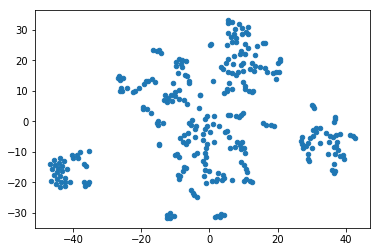

In [12]:
import matplotlib.pyplot as plt
Y = tsne(article_histograms, 2, 50, 20.0)
plt.scatter(Y[:, 0], Y[:, 1], 20)#, article_titles)
plt.show()

2\. [Topic discovery via $k$-means, 30 points] Here you are to use the $k$-means algorithm to cluster the data from problem 1.

Run $k$-means with different values of $k$, e.g. $k=2,5,8$ and investigate your results by looking at the words and article titles associated with each centroid. Feel free to visit Wikipedia if an article’s content is unclear from its title. On the basis of your tests, select a final value of $k$ and run $k$-means again. Give a short description of the topics your clustering discovered along with the 5 most common words from each topic. If the topics do not make sense pick another value of $k$.

*Comments*:

1) When you run the $k$-means implementation in `sklearn.cluster.KMeans` it initializes the centroids by randomly assigning the data points to $k$ groups and taking the $k$ representatives as the means of the groups. (This means that if you run the function twice, with the same data, you might get diﬀerent results.) The cluster centers and labels can be accessed via the attributes `cluster_centers_` and `labels_`. The attribute `labels_` contains the index of each vector’s closest centroid (labels start from zero), so if the 30th entry in `labels` is 7, then the 30th vector’s closest centroid is the 7th entry in `centroids` (indexing starts from zero).

2) There are many ways to explore your results. For example, you could print the titles of all articles in a cluster. Alternatively, you could ﬁnd a topic’s most common words by ordering `dictionary` by the size of its centroid’s entries. A larger entry for a word implies it was more common in articles from that topic.

In [ ]:
# Your solution here
# ...

3\. [Image compresssion with $k$-means, 30 points] In this problem which is from Andrew Ng at Stanford, you 
will apply the $k$-means algorithm to lossy image compression, by reducing the number of colors used in an image.
You will be using the files `mandrill-small.tiff` and `mandrill-large.tiff`.

The `mandrill-large.tiff` file contains a 512x512 image of a mandrill represented in 24-
bit color. This means that, for each of the 262144 pixels in the image, there are three 8-bit
numbers (each ranging from 0 to 255) that represent the red, green, and blue intensity
values for that pixel. The straightforward representation of this image therefore takes
about 262144×3 = 786432 bytes (a byte being 8 bits). To compress the image, we will use
$k$-means to reduce the image to $k = 16$ colors. More specifically, each pixel in the image is
considered a point in the three-dimensional $(r, g, b)$-space. To compress the image, we will
cluster these points in color-space into 16 clusters, and replace each pixel with the closest
cluster centroid.

Follow the instructions below.

To load the image, type
```python
   from matplotlib.image import imread.
   import matplotlib.pyplot as plt
   A = imread('mandrill-large.tiff')```

Now, `A` is a "three dimensional" matrix, and `A[:,:,0]`, `A[:,:,1]` and `A[:,:,2]` are $512 \times 512$ arrays
that respectively contain the red, green and blue values for each pixel. To display the image, enter
```python
   plt.imshow(A);
   plt.show() to display the image```

Note: The `imshow` function expects the red, green and blue values to be between 0 and 1. You should start by scaling all  $(R,G,B)$ values by dividing by 255, otherwise you may end up with incorrect color scheme in the reconstructed image below.

Since the large image has 262144 pixels and would take a while to cluster, we will instead
run vector quantization on a smaller image. Repeat the above with `mandrill-small.tiff`.
Treating each pixel’s $(r, g, b)$ values as an element of $R^3$. Run $k$-means with 16 clusters
on the pixel data from this smaller image.

Take the matrix `A` from `mandrill-large.tiff`, and replace each pixel’s $(r, g, b)$ values
with the value of the closest cluster centroid. Display the new image, and compare it
visually to the original image.

If we represent the image with these reduced (16) colors, by (approximately) what
factor have we compressed the image?

*Comment*: Use the $k$-means implementation in `sklearn.cluster.KMeans`.

In [ ]:
# Your solution here
# ...